# Pandas를 활용한 통계 기초 및 시각화

## Discrete Random Variables (이산 확률 변수)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)

#한글 폰트 사용
import platform
from matplotlib import font_manager
 
if platform.system() == "Darwin":  #Mac
    plt.rc('font', family='AppleGothic')
else:
    font_path = 'C:/Windows/Fonts/malgun.ttf' # For Windows 
    font_name = font_manager.FontProperties(fname=font_path).get_name()  
    plt.rc('font', family=font_name)                           

plt.rcParams['axes.unicode_minus'] = False  #한글사용시 마이너스 사인 깨짐 방지

### 주사위 게임

2개의 주사위를 굴린 결과를 모방하므로 다른 결과를 얻을 수 있지만 범위는 2에서 12 사이로 제한되어야 합니다.

In [3]:
# 주사위
die = pd.DataFrame([1, 2, 3, 4, 5, 6])
die

,0
0,1
1,2
2,3
3,4
4,5
5,6


두개의 주사위를 던진다 -> 1~6 숫자를 두번 복원 추출.

In [4]:
die.sample(2, replace=True)

,0
5,6
3,4


In [5]:
# 두 주사위의 합계
die.sample(2, replace=True).sum()

0    6
dtype: int64

In [6]:
sum_of_dice = die.sample(2, replace=True).sum()
sum_of_dice

0    6
dtype: int64

In [8]:
# 3개의 주사위 던지기 모사
sum_of_three_dice = die.sample(3, replace=True).sum().loc[0]
print('Sum of three dice is', sum_of_three_dice)

Sum of three dice is 8


# Frequency and Distribution (빈도 및 분포)

### 여러 번 주사위 던지기 게임을 모방

- 다음 코드는 50번 반복하는 주사위 게임을 모방합니다. 그리고 결과는 모두 `results` 에 저장됩니다.

In [9]:
trial = 50
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [10]:
print(results)

[7, 11, 5, 11, 8, 9, 8, 9, 7, 3, 8, 8, 4, 6, 3, 7, 7, 3, 10, 4, 9, 3, 9, 8, 7, 6, 4, 7, 6, 3, 6, 11, 10, 6, 2, 6, 6, 8, 2, 4, 10, 2, 12, 11, 8, 10, 10, 5, 9, 10]


- 합계를 빈도수별로 정리한 코드입니다.
- value_counts() - 고유한 값의 개수를 포함하는 시리즈를 반환합니다.

In [11]:
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
print(sort_freq)

2     3
3     5
4     4
5     2
6     7
7     6
8     7
9     5
10    6
11    4
12    1
Name: 0, dtype: int64


Text(0, 0.5, '빈도수')

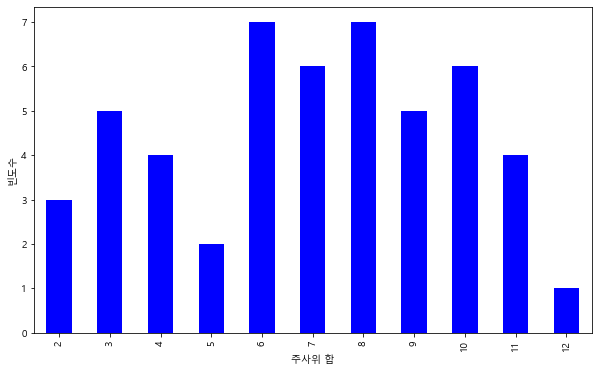

In [12]:
#bar chart 시각화

sort_freq.plot(kind='bar', color='blue', figsize=(10, 6))
plt.xlabel('주사위 합')
plt.ylabel('빈도수')

## Relative Frequency (상대 빈도)

- 상대 빈도를 사용하여 다른 시도 횟수의 결과를 비교할 수 있도록 빈도를 재조정할 수 있습니다.

Text(0, 0.5, '상대 빈도')

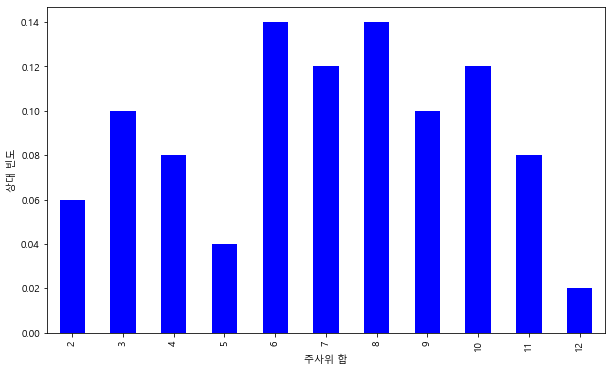

In [13]:
import matplotlib.pyplot as plt

relative_freq = sort_freq / trial
relative_freq.plot(kind='bar', color='blue', figsize=(10, 6))
plt.xlabel('주사위 합')
plt.ylabel('상대 빈도')

- 시도 횟수를 10,000으로 늘리면 정규 분포 형태를 보입니다.

In [14]:
trial = 10_000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
freq

7     1600
8     1403
6     1341
9     1111
5     1101
4      903
10     858
11     565
3      564
2      284
12     270
Name: 0, dtype: int64

<AxesSubplot:>

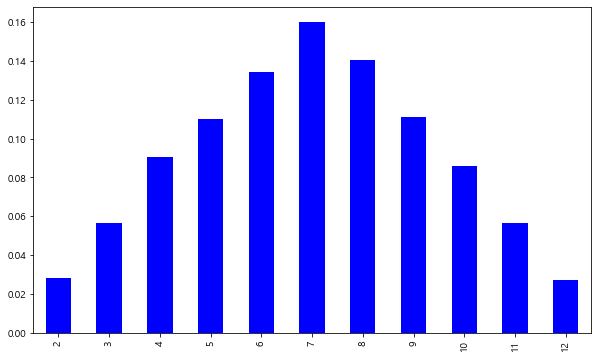

In [15]:
sort_freq = freq.sort_index()
relative_freq = sort_freq / trial
relative_freq.plot(kind='bar', color='blue', figsize=(10, 6))

## Distribution (분포)의 평균과 분산

$$mean (expectation) = \sum_{i}x_i p_i$$
$$variance = \sum_{i}(x_i - mean)^2 p_i$$

- 분포의 평균과 분산을 출력합니다. 평균과 분산을 사용하여 분포를 설명할 수 있습니다.

In [16]:
prob = freq / 10_000
prob

7     0.1600
8     0.1403
6     0.1341
9     0.1111
5     0.1101
4     0.0903
10    0.0858
11    0.0565
3     0.0564
2     0.0284
12    0.0270
Name: 0, dtype: float64

## 평균

$$mean (expectation) = \sum_{i}x_i p_i$$

In [17]:
prob.index

Int64Index([7, 8, 6, 9, 5, 4, 10, 11, 3, 2, 12], dtype='int64')

In [18]:
prob.values

array([0.16  , 0.1403, 0.1341, 0.1111, 0.1101, 0.0903, 0.0858, 0.0565,
       0.0564, 0.0284, 0.027 ])

In [19]:
mean = sum(prob.index * prob.values)
mean

6.9881

**평균 7 은 histogram 에서 나타난 평균 7 과 일치**

## 분산
- 기댓값 $\displaystyle \mu =\operatorname {E} [X]$$\displaystyle \mu =\operatorname {E} [X]$로부터 확률변수가 얼마나 떨어져있는지 그 정도를 제곱한 것의 기댓값
$$variance = \sum_{i}(x_i -\mu)^2 p_i$$

In [44]:
var = sum((prob.index - mean)**2 * prob.values)
var

5.93535839

- 표준 편차

In [45]:
std = np.sqrt(var)
std

2.4362590974689042

- kde plot 시각화로 평균, 표준 편차 확인

<AxesSubplot:ylabel='Density'>

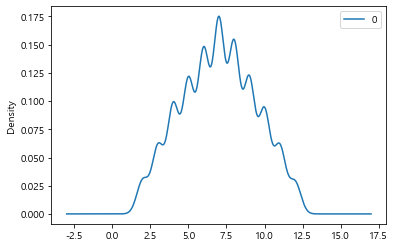

In [60]:
pd.DataFrame(results).plot(kind='kde')

- 계산한 평균, 표준 편차와 시각화 내용이 일치

# 모집단, 표본집단, 신뢰구간

## Population and Sample (모집단, 표본집단)

In [61]:
# 10개의 데이터로 모집단 DataFrame 만들기

data = pd.DataFrame()
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]

- 복원 추출법

In [64]:
# 모집단에서 5개의 샘플을 복원추출법으로 뽑습니다.

a_sample_with_replacement = data['Population'].sample(5, replace=True)
print(a_sample_with_replacement)

6    72
0    47
0    47
9    60
5    13
Name: Population, dtype: int64


- 비복원 추출법

In [65]:
#모집단에서 5개의 샘플을 비복원추출법으로 뽑습니다.

a_sample_without_replacement = data['Population'].sample(5, replace=False)
print(a_sample_without_replacement)

8    50
2    85
9    60
0    47
3    20
Name: Population, dtype: int64


# Parameters and Statistics (모수와 통계치)

In [66]:
mu = data['Population'].mean()
std = data['Population'].std()  

print('모집단 평균 ', mu)
print('모집단 표준편차', std)

모집단 평균  43.0
모집단 표준편차 25.20581943387942


# Variation of Sample (표본의 분산)

- 표본 평균은 자유도가 1 감소하므로 `ddof=1`로 지정

In [67]:
# 표본 평균과 표준편차는 계속 변경되지만 항상 특정 범위 내에 있습니다.
Fstsample = pd.DataFrame(np.random.normal(10, 5, size=30))

print('표본 평균 ', Fstsample[0].mean())
print('표본의 표준편차 is ', Fstsample[0].std(ddof=1))

표본 평균  9.379719312473954
표본의 표준편차 is  4.137781065184424
